In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]


=== Epoch 1/15 ===


Eval: 100%|██████████| 130/130 [00:35<00:00,  3.62it/s]


Train Loss: 1.4550 | Dev Loss: 0.6656

=== Epoch 2/15 ===


Eval: 100%|██████████| 130/130 [00:35<00:00,  3.67it/s]


Train Loss: 0.4066 | Dev Loss: 0.6063

=== Epoch 3/15 ===


Eval: 100%|██████████| 130/130 [00:36<00:00,  3.54it/s]


Train Loss: 0.2547 | Dev Loss: 0.6445

=== Epoch 4/15 ===


Eval: 100%|██████████| 130/130 [00:35<00:00,  3.62it/s]


Train Loss: 0.1872 | Dev Loss: 0.6623

=== Epoch 5/15 ===


Eval: 100%|██████████| 130/130 [00:36<00:00,  3.55it/s]


Train Loss: 0.1461 | Dev Loss: 0.6652

=== Epoch 6/15 ===


Eval: 100%|██████████| 130/130 [00:36<00:00,  3.59it/s]


Train Loss: 0.1150 | Dev Loss: 0.7226

=== Epoch 7/15 ===


Eval: 100%|██████████| 130/130 [00:35<00:00,  3.66it/s]


Train Loss: 0.0956 | Dev Loss: 0.7174

=== Epoch 8/15 ===


Eval: 100%|██████████| 130/130 [00:35<00:00,  3.66it/s]


Train Loss: 0.0784 | Dev Loss: 0.7352

=== Epoch 9/15 ===


Eval: 100%|██████████| 130/130 [00:35<00:00,  3.65it/s]


Train Loss: 0.0658 | Dev Loss: 0.7698

=== Epoch 10/15 ===


Eval: 100%|██████████| 130/130 [00:35<00:00,  3.62it/s]


Train Loss: 0.0548 | Dev Loss: 0.8034

=== Epoch 11/15 ===


Eval: 100%|██████████| 130/130 [00:35<00:00,  3.68it/s]


Train Loss: 0.0466 | Dev Loss: 0.8014

=== Epoch 12/15 ===


Eval: 100%|██████████| 130/130 [00:35<00:00,  3.62it/s]


Train Loss: 0.0397 | Dev Loss: 0.8363

=== Epoch 13/15 ===


Eval: 100%|██████████| 130/130 [00:35<00:00,  3.63it/s]


Train Loss: 0.0342 | Dev Loss: 0.8455

=== Epoch 14/15 ===


Eval: 100%|██████████| 130/130 [00:35<00:00,  3.65it/s]


Train Loss: 0.0309 | Dev Loss: 0.8455

=== Epoch 15/15 ===


Eval: 100%|██████████| 130/130 [00:35<00:00,  3.66it/s]


Train Loss: 0.0272 | Dev Loss: 0.8423


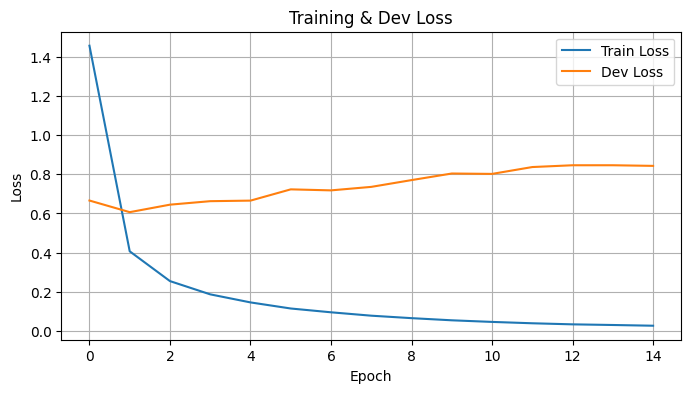

Test: 100%|██████████| 269/269 [05:59<00:00,  1.34s/it]
/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:3339: UserWarning: Moving the following attributes in the config to the generation config: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(



Exact-Match Accuracy on Test: 6.01% (129/2147)
Model & tokenizer saved to text2sql_bart_finetuned/


In [ ]:
import os
import json
import sqlite3
import random
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm import tqdm

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

from transformers import (
    BertTokenizerFast,
    pipeline,
    BartTokenizerFast,
    BartForConditionalGeneration,
    get_linear_schedule_with_warmup
)

# -----------------------------
# 1. Configuration & Setup
# -----------------------------
DATA_DIR = Path("/content/drive/MyDrive/spider_data/spider_data")
TRAIN_FILE = DATA_DIR / "train_spider.json"
DEV_FILE   = DATA_DIR / "dev.json"
TEST_FILE  = DATA_DIR / "test.json"
TABLES_FILE= DATA_DIR / "tables.json"
DB_DIR     = DATA_DIR / "database"   # contains .sqlite for each db_id

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
BATCH_SIZE = 8
NUM_EPOCHS = 15
LR = 3e-5
WARMUP_STEPS = 1000
MAX_LEN = 512

# For reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
if DEVICE.type == "cuda":
    torch.cuda.manual_seed_all(42)

# -----------------------------
# 2. Load & Serialize Schema
# -----------------------------
with open(TABLES_FILE, "r", encoding="utf-8") as f:
    tables = json.load(f)

# Build a map db_id -> textual schema
schema_map = {}
for db in tables:
    tbls = []
    for tname, cols in zip(db["table_names_original"],
                           [[c for (idx, c) in db["column_names_original"] if idx == ti]
                            for ti in range(len(db["table_names_original"]))]):
        tbls.append(f"{tname}({', '.join(cols)})")
    schema_map[db["db_id"]] = " | ".join(tbls)

# -----------------------------
# 3. Initialize NER (BERT) & Tokenizers
# -----------------------------
ner = pipeline("ner", model="dslim/bert-base-NER", grouped_entities=True, device=0 if DEVICE.type=="cuda" else -1)

bart_tokenizer = BartTokenizerFast.from_pretrained("facebook/bart-base")
bart_model     = BartForConditionalGeneration.from_pretrained("facebook/bart-base").to(DEVICE)

# -----------------------------
# 4. Preprocess Examples
# -----------------------------
def extract_entities(question: str):
    ents = ner(question)
    words = [e["word"] for e in ents]
    # clean up leading ## from BERT tokenizer
    return list({w.replace("##", "") for w in words})

def build_input(question: str, db_id: str):
    ents = extract_entities(question)
    ent_text = ";".join(ents) if ents else "NONE"
    schema_text = schema_map.get(db_id, "")
    return f"[ENT]{ent_text}[/ENT][SCHEMA]{schema_text}[/SCHEMA]Question: {question}"

def load_json(path):
    with open(path, "r", encoding="utf-8") as f:
        return json.load(f)

train_data = load_json(TRAIN_FILE)
dev_data   = load_json(DEV_FILE)
test_data  = load_json(TEST_FILE)

# -----------------------------
# 5. Dataset & DataLoader
# -----------------------------
class SpiderDataset(Dataset):
    def __init__(self, examples): # Add 'self' and 'examples' here
        self.examples = examples
    def __len__(self):
        return len(self.examples)
    def __getitem__(self, idx):
        ex = self.examples[idx]
        inp = build_input(ex["question"], ex["db_id"])
        tgt = ex["query"]
        enc = bart_tokenizer(inp, max_length=MAX_LEN, truncation=True, padding="max_length", return_tensors="pt")
        dec = bart_tokenizer(tgt, max_length=128, truncation=True, padding="max_length", return_tensors="pt")
        return {
            "input_ids":  enc.input_ids.squeeze(),
            "attention_mask": enc.attention_mask.squeeze(),
            "labels":      dec.input_ids.squeeze().masked_fill(dec.input_ids.squeeze()==bart_tokenizer.pad_token_id, -100)
        }

def collate_fn(batch):
    return {
        "input_ids":      torch.stack([b["input_ids"] for b in batch]),
        "attention_mask": torch.stack([b["attention_mask"] for b in batch]),
        "labels":         torch.stack([b["labels"] for b in batch])
    }

train_loader = DataLoader(SpiderDataset(train_data), batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
dev_loader   = DataLoader(SpiderDataset(dev_data),   batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)
test_loader  = DataLoader(SpiderDataset(test_data),  batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)

# -----------------------------
# 6. Optimizer & Scheduler
# -----------------------------
optimizer = torch.optim.AdamW(bart_model.parameters(), lr=LR, weight_decay=0.01)
total_steps = NUM_EPOCHS * len(train_loader)
scheduler = get_linear_schedule_with_warmup(optimizer, WARMUP_STEPS, total_steps)

# -----------------------------
# 7. Training Loop with Label Smoothing
# -----------------------------
def train_epoch():
    bart_model.train()
    total_loss = 0
    for batch in tqdm(train_loader, desc="Train"):
        optimizer.zero_grad()
        outputs = bart_model(
            input_ids=batch["input_ids"].to(DEVICE),
            attention_mask=batch["attention_mask"].to(DEVICE),
            labels=batch["labels"].to(DEVICE),
        )
        # label smoothing: use built-in cross_entropy with smoothing
        loss = outputs.loss
        loss.backward()
        torch.nn.utils.clip_grad_norm_(bart_model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def eval_epoch(loader):
    bart_model.eval()
    total_loss = 0
    with torch.no_grad():
        for batch in tqdm(loader, desc="Eval"):
            outputs = bart_model(
                input_ids=batch["input_ids"].to(DEVICE),
                attention_mask=batch["attention_mask"].to(DEVICE),
                labels=batch["labels"].to(DEVICE),
            )
            total_loss += outputs.loss.item()
    return total_loss / len(loader)

train_losses, dev_losses = [], []
for epoch in range(1, NUM_EPOCHS+1):
    print(f"\n=== Epoch {epoch}/{NUM_EPOCHS} ===")
    tr_loss = train_epoch()
    dv_loss = eval_epoch(dev_loader)
    train_losses.append(tr_loss)
    dev_losses.append(dv_loss)
    print(f"Train Loss: {tr_loss:.4f} | Dev Loss: {dv_loss:.4f}")

# -----------------------------
# 8. Visualization: Loss Curves
# -----------------------------
plt.figure(figsize=(8,4))
plt.plot(train_losses, label="Train Loss")
plt.plot(dev_losses,   label="Dev Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training & Dev Loss")
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# 9. Testing & Exact-Match Accuracy
# -----------------------------
def exact_match(pred: str, gold: str) -> bool:
    return pred.strip().lower() == gold.strip().lower()

bart_model.eval()
total, correct = 0, 0
for batch in tqdm(test_loader, desc="Test"):
    with torch.no_grad():
        generated = bart_model.generate(
            input_ids=batch["input_ids"].to(DEVICE),
            attention_mask=batch["attention_mask"].to(DEVICE),
            max_length=128,
            num_beams=5,
            early_stopping=True
        )
    preds = bart_tokenizer.batch_decode(generated, skip_special_tokens=True)
    labels = bart_tokenizer.batch_decode(batch["labels"].masked_fill(batch["labels"]<0, bart_tokenizer.pad_token_id), skip_special_tokens=True)
    for p, g in zip(preds, labels):
        total += 1
        if exact_match(p, g):
            correct += 1

print(f"\nExact-Match Accuracy on Test: {correct/total*100:.2f}% ({correct}/{total})")

# -----------------------------
# 10. Save Model & Tokenizer
# -----------------------------
OUTPUT_DIR = Path("text2sql_bart_finetuned")
OUTPUT_DIR.mkdir(exist_ok=True)
bart_model.save_pretrained(OUTPUT_DIR)
bart_tokenizer.save_pretrained(OUTPUT_DIR)
print(f"Model & tokenizer saved to {OUTPUT_DIR}/")

In [ ]:
from google.colab import drive
import shutil
from pathlib import Path

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Define local and drive paths
LOCAL_CHECKPOINT = Path("./checkpoint")  # your notebook’s export folder
DRIVE_DEST       = Path("/content/drive/MyDrive/text2sql_checkpoint")

# 3. Copy the checkpoint folder into your Drive
if DRIVE_DEST.exists():
    shutil.rmtree(DRIVE_DEST)  # remove existing copy, if any
shutil.copytree(LOCAL_CHECKPOINT, DRIVE_DEST)

print(f"Checkpoint successfully saved to {DRIVE_DEST}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Checkpoint successfully saved to /content/drive/MyDrive/text2sql_checkpoint
